<a href="https://colab.research.google.com/github/RatchanonPa/bsc_dpdm24/blob/main/final_exam_dpdm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# 1. สร้างข้อมูลตัวอย่าง (สมมติข้อมูล 20 แถวตามโจทย์)
data = pd.read_csv('/content/final dbms data.csv')
df = data
df

,age,income,student,credit_rating,visit_time,buys_computer
0,<=30,high,yes,fair,11:00,no
1,>40,high,no,excellent,12:00,no
2,31..40,high,no,fair,11:00,no
3,31..40,low,yes,fair,17:00,yes
4,>40,medium,no,NaN,14:00,yes
5,<=30,low,yes,fair,15:00,yes
6,>40,low,yes,excellent,NaN,no
7,31..40,low,yes,excellent,10:00,yes
8,<=30,NaN,no,fair,15:00,no
9,<=30,low,yes,excellent,12:00,yes


In [ ]:
# 2. การเตรียมข้อมูล (Data Preparation)
# 2.1 เติมข้อมูลที่ขาดหายไปด้วยค่าที่พบบ่อยที่สุด (mode)
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)
data

<ipython-input-6-4401a43eb4a4>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


,age,income,student,credit_rating,visit_time,buys_computer
0,<=30,high,yes,fair,11:00,no
1,>40,high,no,excellent,12:00,no
2,31..40,high,no,fair,11:00,no
3,31..40,low,yes,fair,17:00,yes
4,>40,medium,no,fair,14:00,yes
5,<=30,low,yes,fair,15:00,yes
6,>40,low,yes,excellent,15:00,no
7,31..40,low,yes,excellent,10:00,yes
8,<=30,high,no,fair,15:00,no
9,<=30,low,yes,excellent,12:00,yes


In [ ]:
# 2.2 แปลงข้อมูลเป็นตัวเลข (Data Encoding)
# age
df['age'] = df['age'].map({'<=30': 0, '31..40': 1, '>40': 2})
# income
df['income'] = df['income'].map({'low': 0, 'medium': 1, 'high': 2})
# student
df['student'] = df['student'].map({'no': 0, 'yes': 1})
# credit_rating
df['credit_rating'] = df['credit_rating'].map({'fair': 0, 'excellent': 1})
# visit_time (แปลงเป็นชั่วโมง)
df['visit_time'] = df['visit_time'].apply(lambda x: int(x.split(':')[0]))
# buys_computer
df['buys_computer'] = df['buys_computer'].map({'no': 0, 'yes': 1})

In [ ]:
df

,age,income,student,credit_rating,visit_time,buys_computer
0,0,2,1,0,11,0
1,2,2,0,1,12,0
2,1,2,0,0,11,0
3,1,0,1,0,17,1
4,2,1,0,0,14,1
5,0,0,1,0,15,1
6,2,0,1,1,15,0
7,1,0,1,1,10,1
8,0,2,0,0,15,0
9,0,0,1,1,12,1


In [ ]:
# แยกฟีเจอร์ (X) และเป้าหมาย (y)
X = df.drop('buys_computer', axis=1)
y = df['buys_computer']

In [ ]:
# prompt: แบ่งข้อมูลแบบ stratified

# แบ่งข้อมูลแบบ stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
X_train.groupby(y_train).count() # Group by y_train (target variable) instead

,age,income,student,credit_rating,visit_time
buys_computer,,,,,
0,6,6,6,6,6
1,10,10,10,10,10


In [ ]:
X_test.groupby(y_test).count()

,age,income,student,credit_rating,visit_time
buys_computer,,,,,
0,2,2,2,2,2
1,2,2,2,2,2


In [ ]:
# 4. การสร้างและฝึกโมเดลทั้ง 5 แบบ

# เก็บผลลัพธ์ของแต่ละโมเดล
results = {}

# 4.1 Decision Tree (Max_depth=3, Min_sample_leaf=2)
dt1 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)
dt1.fit(X_train, y_train)
y_pred_dt1 = dt1.predict(X_test)
results['Decision Tree (Max_depth=3)'] = {
    'accuracy': accuracy_score(y_test, y_pred_dt1),
    'precision': precision_score(y_test, y_pred_dt1),
    'recall': recall_score(y_test, y_pred_dt1),
    'f1': f1_score(y_test, y_pred_dt1)
}

In [ ]:
dt1.feature_importances_

array([0.        , 0.55453149, 0.29493088, 0.        , 0.15053763])

In [ ]:
# 4.2 Decision Tree (Max_depth=4, Max_features=3)
dt2 = DecisionTreeClassifier(max_depth=4, max_features=3)
dt2.fit(X_train, y_train)
y_pred_dt2 = dt2.predict(X_test)
results['Decision Tree (Max_depth=4)'] = {
    'accuracy': accuracy_score(y_test, y_pred_dt2),
    'precision': precision_score(y_test, y_pred_dt2),
    'recall': recall_score(y_test, y_pred_dt2),
    'f1': f1_score(y_test, y_pred_dt2)
}

In [ ]:
dt2.feature_importances_

array([0.17777778, 0.26243386, 0.38201058, 0.17777778, 0.        ])

In [ ]:
# 4.3 Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
results['Naive Bayes'] = {
    'accuracy': accuracy_score(y_test, y_pred_nb),
    'precision': precision_score(y_test, y_pred_nb),
    'recall': recall_score(y_test, y_pred_nb),
    'f1': f1_score(y_test, y_pred_nb)
}

In [ ]:
# 4.4 K-Nearest Neighbor (K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
results['KNN (K=1)'] = {
    'accuracy': accuracy_score(y_test, y_pred_knn),
    'precision': precision_score(y_test, y_pred_knn),
    'recall': recall_score(y_test, y_pred_knn),
    'f1': f1_score(y_test, y_pred_knn)
}

In [ ]:
# 4.5 Perceptron (2 Epoch)
perceptron = Perceptron(max_iter=2, random_state=42)
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)
results['Perceptron (2 Epoch)'] = {
    'accuracy': accuracy_score(y_test, y_pred_perceptron),
    'precision': precision_score(y_test, y_pred_perceptron),
    'recall': recall_score(y_test, y_pred_perceptron),
    'f1': f1_score(y_test, y_pred_perceptron)
}

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
# 5. แสดงผลลัพธ์
print("ผลลัพธ์การเปรียบเทียบประสิทธิภาพโมเดล:")
print("{:<30} {:<10} {:<15} {:<10} {:<10}".format('Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'))
print("-" * 75)
for model, metrics in results.items():
    print("{:<30} {:<10.2f} {:<15.2f} {:<10.2f} {:<10.2f}".format(
        model, metrics['accuracy'], metrics['precision'], metrics['recall'], metrics['f1']))

# หาโมเดลที่ดีที่สุดตาม Accuracy
best_model = max(results, key=lambda x: results[x]['accuracy'])
print(f"\nโมเดลที่ดีที่สุด: {best_model} (Accuracy = {results[best_model]['accuracy']:.2f})")

ผลลัพธ์การเปรียบเทียบประสิทธิภาพโมเดล:
Model                          Accuracy   Precision       Recall     F1-score  
---------------------------------------------------------------------------
Decision Tree (Max_depth=3)    0.50       0.33            1.00       0.50      
Decision Tree (Max_depth=4)    0.75       0.50            1.00       0.67      
Naive Bayes                    0.75       0.50            1.00       0.67      
KNN (K=1)                      0.50       0.33            1.00       0.50      
Perceptron (2 Epoch)           0.25       0.25            1.00       0.40      

โมเดลที่ดีที่สุด: Decision Tree (Max_depth=4) (Accuracy = 0.75)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# สร้างและฝึกโมเดล Decision Tree
dt2 = DecisionTreeClassifier(max_depth=4, max_features=3)
dt2.fit(X_train, y_train)

# ทำนายผลบนชุดข้อมูลทดสอบ
y_pred_dt2 = dt2.predict(X_test)

# คำนวณค่าตัวชี้วัด
accuracy = accuracy_score(y_test, y_pred_dt2)
precision = precision_score(y_test, y_pred_dt2)
recall = recall_score(y_test, y_pred_dt2)
f1 = f1_score(y_test, y_pred_dt2)

# แสดงผลลัพธ์
print("ผลลัพธ์ของ Decision Tree (Max_depth=4, Max_features=3) บน Test Data")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


ผลลัพธ์ของ Decision Tree (Max_depth=4, Max_features=3) บน Test Data
Accuracy: 0.50
Precision: 0.50
Recall: 1.00
F1-score: 0.67


In [ ]:
import pandas as pd

# สร้าง DataFrame สำหรับเปรียบเทียบผลลัพธ์ของโมเดล
results_df = pd.DataFrame(results).T  # Transpose ให้แต่ละโมเดลเป็นแถว

# แสดงผลลัพธ์ของทุกโมเดลบน Test Data
print("🔹 เปรียบเทียบผลลัพธ์ของโมเดลบนชุดข้อมูลทดสอบ 🔹")
print(results_df)

# หรือถ้าใช้ Jupyter Notebook สามารถใช้ display() เพื่อให้แสดงผลดูง่ายขึ้น
from IPython.display import display
display(results_df)


🔹 เปรียบเทียบผลลัพธ์ของโมเดลบนชุดข้อมูลทดสอบ 🔹
                             accuracy  precision  recall        f1
Decision Tree (Max_depth=3)      0.50   0.500000     1.0  0.666667
Decision Tree (Max_depth=4)      0.75   0.666667     1.0  0.800000
Naive Bayes                      0.50   0.500000     1.0  0.666667
KNN (K=1)                        0.50   0.500000     1.0  0.666667
Perceptron (2 Epoch)             0.50   0.500000     1.0  0.666667


,accuracy,precision,recall,f1
Decision Tree (Max_depth=3),0.50,0.500000,1.0,0.666667
Decision Tree (Max_depth=4),0.75,0.666667,1.0,0.800000
Naive Bayes,0.50,0.500000,1.0,0.666667
KNN (K=1),0.50,0.500000,1.0,0.666667
Perceptron (2 Epoch),0.50,0.500000,1.0,0.666667


In [ ]:
from sklearn.model_selection import GridSearchCV

# กำหนดพารามิเตอร์ที่ต้องการค้นหา
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': [2, 3, 4]
}

# สร้างโมเดล Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# ใช้ GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# แสดงค่าพารามิเตอร์ที่ดีที่สุด
print("Best parameters:", grid_search.best_params_)

# ทดสอบโมเดลที่ดีที่สุด
best_dt = grid_search.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)

# ประเมินผล
best_results = {
    'accuracy': accuracy_score(y_test, y_pred_best_dt),
    'precision': precision_score(y_test, y_pred_best_dt),
    'recall': recall_score(y_test, y_pred_best_dt),
    'f1': f1_score(y_test, y_pred_best_dt)
}

print("\nPerformance of Best Decision Tree Model:")
print(best_results)


Best parameters: {'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Performance of Best Decision Tree Model:
{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}


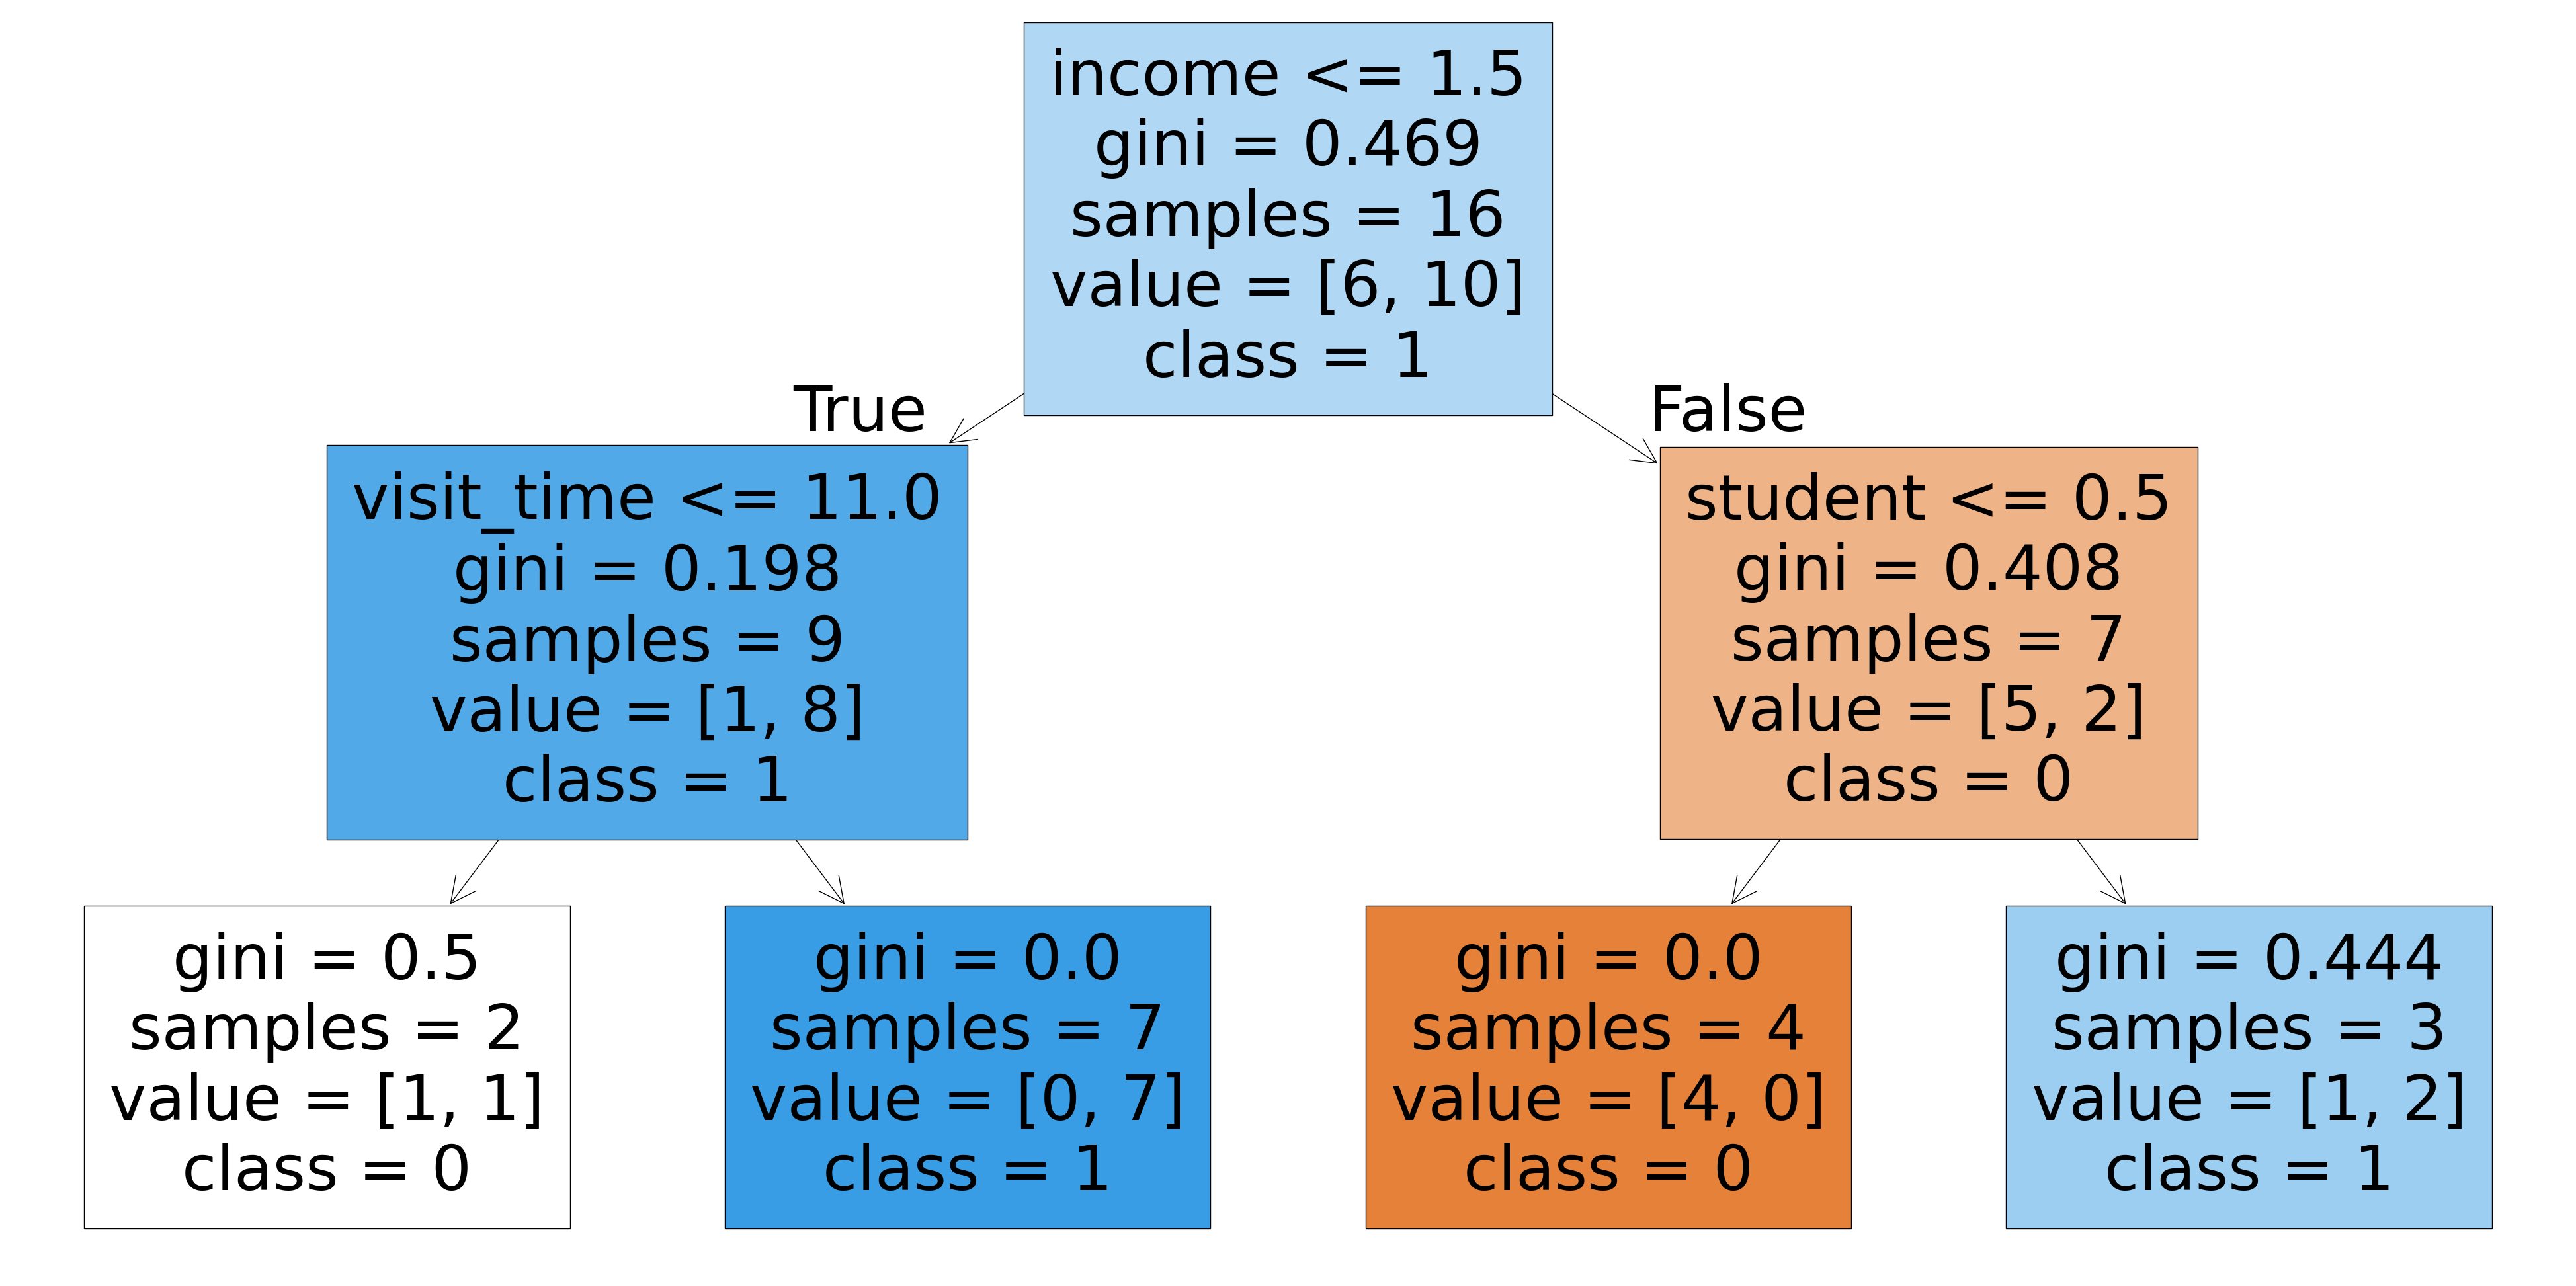

In [ ]:
# prompt: plot the trained

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming dt_classifier2 is your trained DecisionTreeClassifier
plt.figure(figsize=(50,25))
plot_tree(dt1, filled=True, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

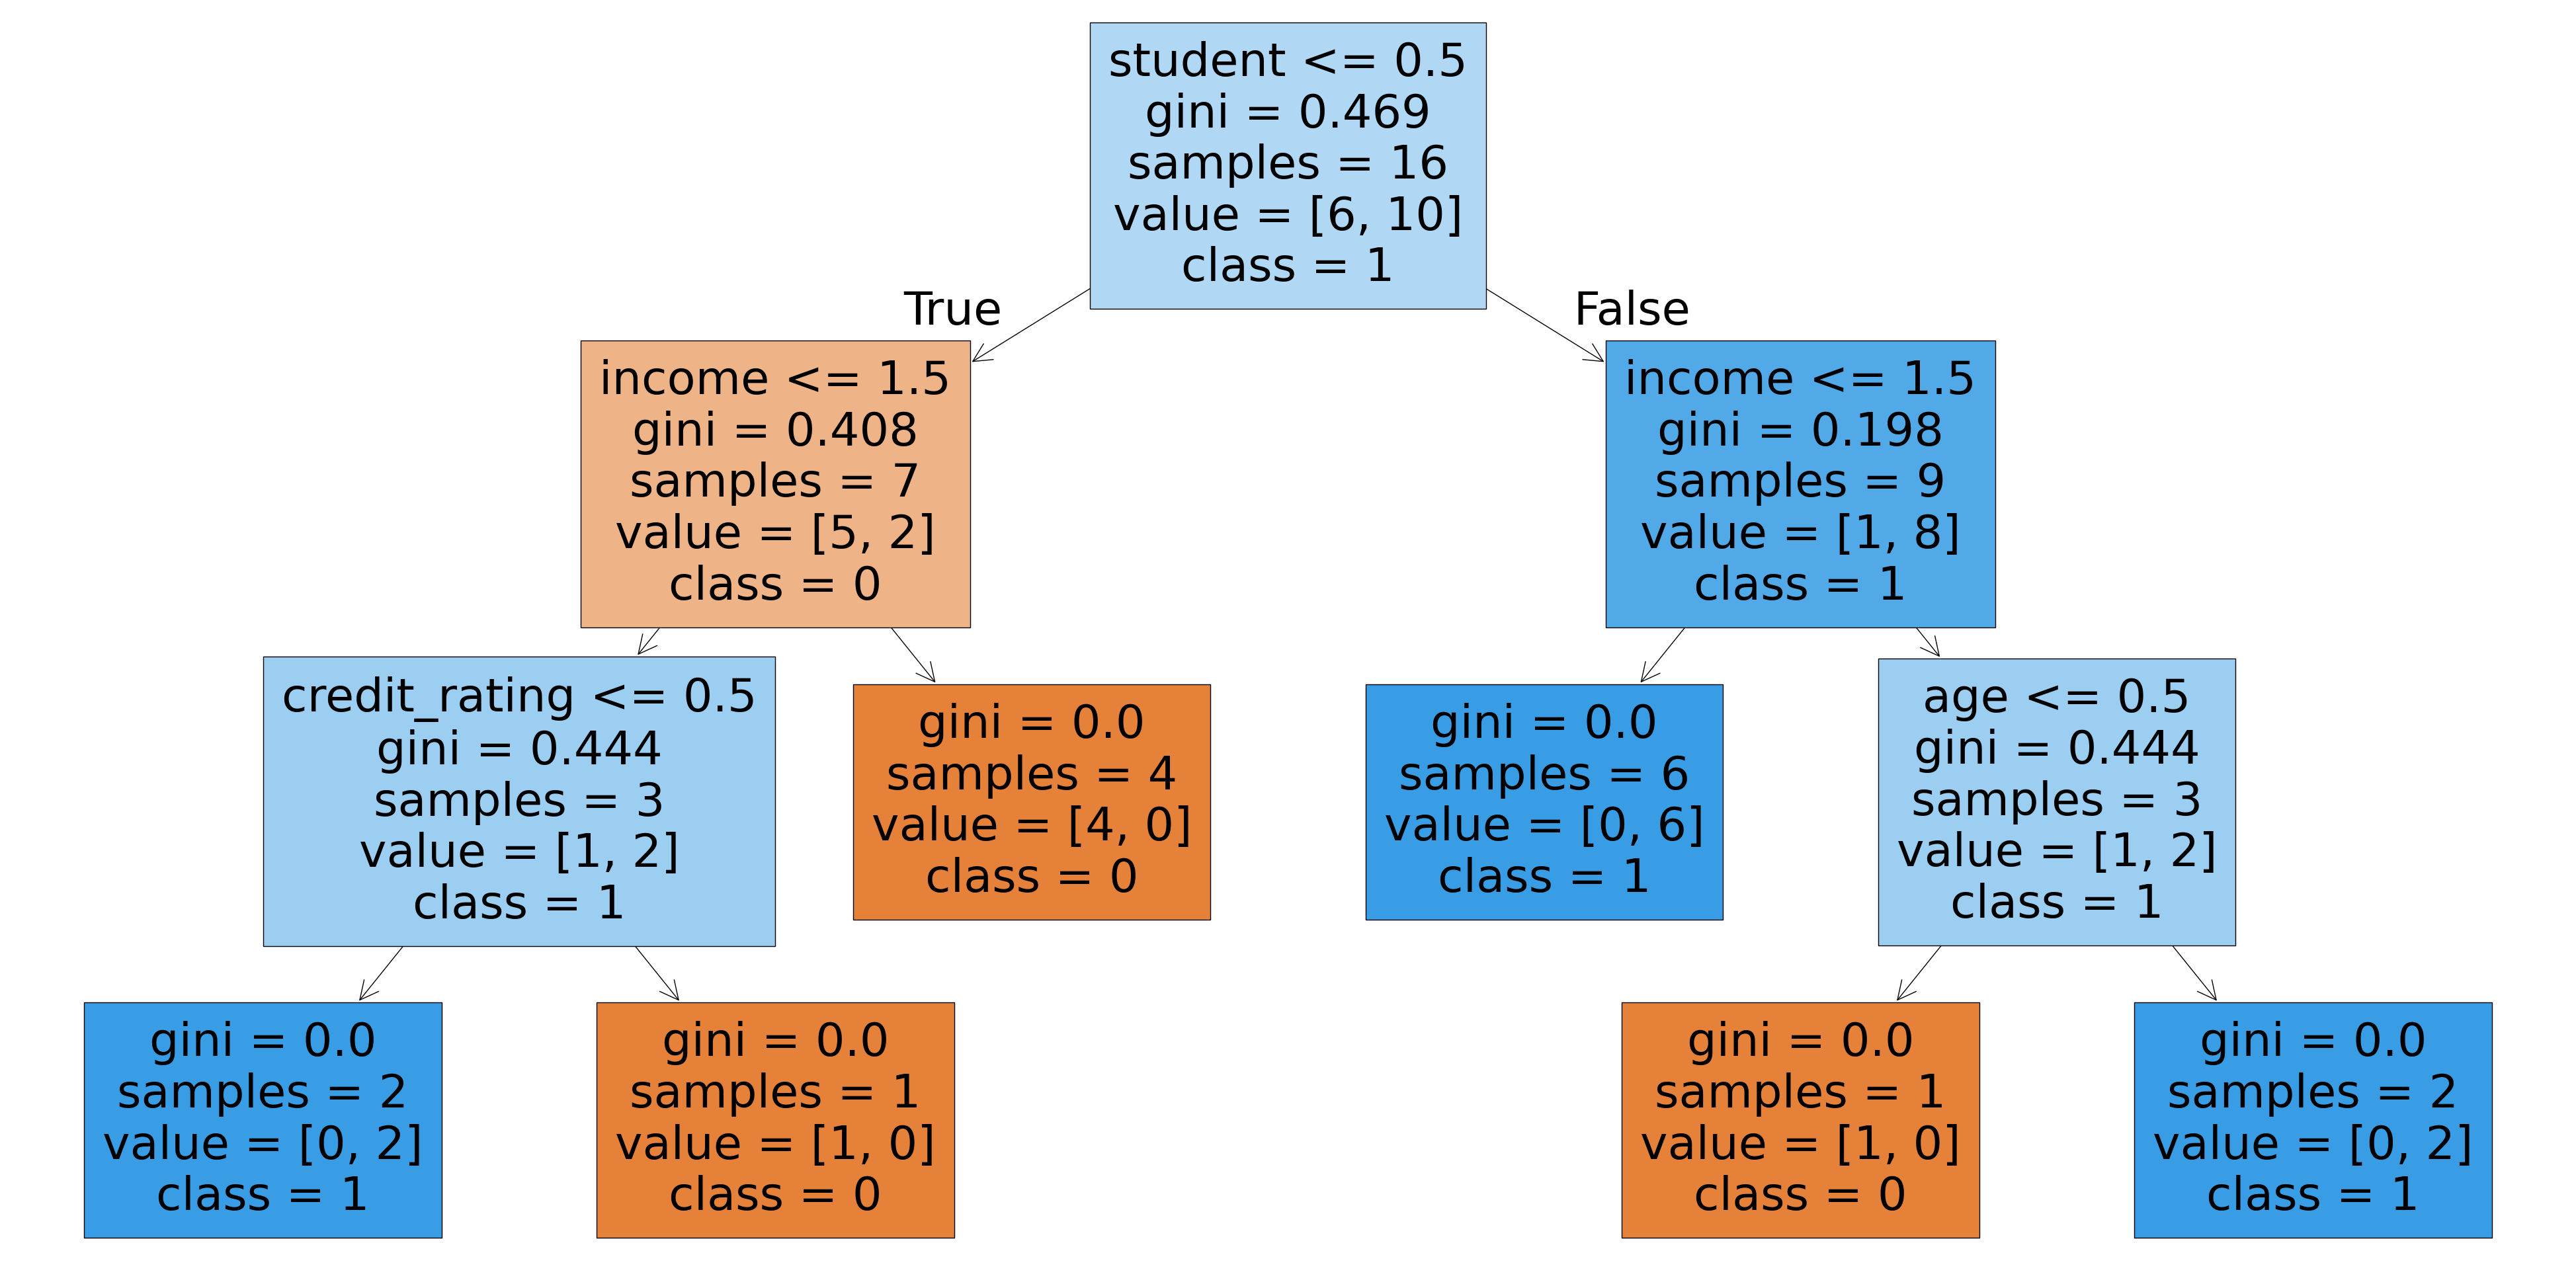

In [ ]:
# prompt: plot the trained

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming dt_classifier2 is your trained DecisionTreeClassifier
plt.figure(figsize=(50,25))
plot_tree(dt2, filled=True, feature_names=X_train.columns, class_names=['0','1'])
plt.show()